# Homework 6.
made by German Ilya

## **Part1.**

##### Assignment 1.

Choose proteins from [UniProt](https://www.uniprot.org/uniprotkb?query=%2AHUMAN).
- KR124_HUMAN (KRTAP12-4)
- IL17F_HUMAN (IL17F)
- LENG1_HUMAN (LENG1)
- EPGN_HUMAN (EPGN)
- CS012_HUMAN (C19orf12)
- CS044_HUMAN (C19orf44)
- CS047_HUMAN (C19orf47)
- CS018_HUMAN (C19orf18)
- CS067_HUMAN (C19orf67)
- CS073_HUMAN (C19orf73)

Find orthologs by using [NCBI database](https://www.ncbi.nlm.nih.gov/gene/). Choose chimpanzee.

- [KRTAP12-4 human](https://www.ncbi.nlm.nih.gov/gene/386684/) and [KRTAP12-4 chimp](https://www.ncbi.nlm.nih.gov/gene/738964/)
- [IL17F human](https://www.ncbi.nlm.nih.gov/gene/112744/) and [IL17F chimp](https://www.ncbi.nlm.nih.gov/gene/472030/)
- [LENG1 human](https://www.ncbi.nlm.nih.gov/gene/79165/) and [LENG1 chimp](https://www.ncbi.nlm.nih.gov/gene/107969801/)
- [EPGN human](https://www.ncbi.nlm.nih.gov/gene/255324/) and [EPGN chimp](https://www.ncbi.nlm.nih.gov/gene/461252/)
- [C19orf12 human](https://www.ncbi.nlm.nih.gov/gene/83636/) and [C19H19orf12 chimp](https://www.ncbi.nlm.nih.gov/gene/455913/)
- [C19orf44 human](https://www.ncbi.nlm.nih.gov/gene/84167/) and [C19H19orf44 chimp](https://www.ncbi.nlm.nih.gov/gene/455811/)
- [C19orf47 human](https://www.ncbi.nlm.nih.gov/gene/126526/) and [C19H19orf47 chimp](https://www.ncbi.nlm.nih.gov/gene/100991452/)
- [C19orf18 human](https://www.ncbi.nlm.nih.gov/gene/147685/) and [C19H19orf18 chimp](https://www.ncbi.nlm.nih.gov/gene/741785/)
- [C19orf67 human](https://www.ncbi.nlm.nih.gov/gene/646457/) and [C19H19orf67 chimp](https://www.ncbi.nlm.nih.gov/gene/747537/)
- [C19orf73 human](https://www.ncbi.nlm.nih.gov/gene/55150/) and [C19H19orf73 chimp](https://www.ncbi.nlm.nih.gov/gene/747945/)


Download all data and extract files `gene.fna` into one directory. The run a script (I made it because it is too difficult to do so many operations by your own and didn't make a mistake). Script takes one argument `filename`, reads sequences from this file and writes the only first sequence in another file. So, we prepare data for alignment on site [EMBL-EBI](https://www.ebi.ac.uk/Tools/psa/emboss_needle/).

After pair alignment we get an indentity and similarity.
List of values:

| Protein | Identity | Similarity |
|---------|----------|------------|
| KRTAP12-4 | 45% | 45% |
| IL17F | 96.5% | 96.5% |
| LENG1 | 77.1% | 77.1% |
| EPGN | 73.5% | 73.5% |
| C19orf12 | 69.1% | 69.1% |
| C19orf18 | 84.4% | 84.4% |
| C19orf44 | ? | ? |
| C19orf47 | ? | ? |
| C19orf67 | 51.5% | 51.5% |
| C19orf73 | 76.9% | 76.9% |

Twice we get an error and EMBL-EBI site cannot align the sequences. Screenshots of result are [here](https://github.com/ilyagerman52/bioinformatics/tree/main/homework6/Part1/Assignment1).
Alignment that made in Mega you can find [here](https://github.com/ilyagerman52).

Count mean values of identity and similaryty:
$\text{Mean identity} = \cfrac{1}{8}\left(45\% + 96\% + 77.1\% + 73.5\% + 69.1\% + 84.4\% + 51.5\% + 76.9\%\right) = 71.7\%$
Due to identity is equal to similarity in this case, the mean value of similarity is $71.7\%$ too. 

##### Assignment 2.*


First of all download a human genome from [NCBI database](https://www.ncbi.nlm.nih.gov/data-hub/taxonomy/9606/) and load it in working directory. Unpack it and rename.

In [7]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz
!gunzip GCF_000001405.40_GRCh38.p14_genomic.fna.gz
!mv GCF_000001405.40_GRCh38.p14_genomic.fna human_genome.fna

--2023-05-14 12:13:50--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 165.112.9.230, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 972898531 (928M) [application/x-gzip]
Saving to: ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’

GCF_000001405.40_GR 100%[===================>] 927.83M  34.4MB/s    in 27s     

2023-05-14 12:14:18 (33.7 MB/s) - ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’ saved [972898531/972898531]



Then use next script for generating random subsequences by with length 100.
The file contains too many rows, so read and maintain all of in in REM is not possible. So, we cannot generate it honestly. Another problem is that file contains regions of genome, where is no A, T, G or C (for example only N, or rows with names of sequences). So, we will use the next idea of algorithm:
- Using `readline()` we will read all file, and count the number of rows (it is about $4.1 \cdot 10^8$).
- Then generate $k + p$ different numbers, where $k$ is eual to $100$ - the number of required subsequences and $p$ is oversampling.
- The will read file by readline again. Now, when we are on the row, which number is in generated array, we will save it and supplement by $20$ letters from next row (here we uses that `.fasta` files contains rows with $80$ nucleotides).
- Then save from received dictionary only rows, that have format: $80$ letter + `\n`-symbol + $20$ letters.
- Using oversampling afford us to randomize $k$ from remaining subsequebces and write them to the file.

Using this algorythm afford us to maintain uniform distribution between different parts of genome and remove outliers.

In [ ]:
# Be careful! The script takes quite a long time to run.

import random
random.seed(10)
import re

line_count = sum(1 for line in open('human_genome.fna', "r"))

random_choice = []
for i in range(125):
    random_choice.append(random.randint(0, line_count))

chosen_lines = dict()
line_now = 0
next_20 = -1
with open("human_genome.fna", "r") as genome_file:
    while True:
        line = genome_file.readline()
        if next_20 != -1:
            chosen_lines[next_20] += line[:20]
        if line_now in random_choice:
            next_20 = line_now
            chosen_lines[line_now] = line
        else:
            next_20 = -1
        line_now += 1
        if line_now == line_count:
            break
subseqs_oversampled = []
for value in chosen_lines.values():
    if bool(re.fullmatch("^[ATGCatgc\n]+$", value)):
        subseqs_oversampled.append(value)
subseqs = random.sample(subseqs_oversampled, 100)
with open("subseq_py.fasta", "w") as subseq_py_file:
    for i, seq in enumerate(subseqs):
        subseq_py_file.write(">subseq_"+str(i) + "\n")
        subseq_py_file.write(seq)
        subseq_py_file.write("\n")

We can check that generated file `subseq_py.fasta` is exatly what we need.

In [11]:
!head -n9 subseq_py.fasta # 3 lines for each subsequence
print('...')
!tail -n9 subseq_py.fasta

>subseq_0
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGCATTGT
>subseq_1
TAGCTTCACCATTCTTACACAATATCTAAAACCAGAATATATAGTTAAGGCAATGCTCATCATTAATCATGGTGGATACA
Aatctacatttcaaaaaaaa
>subseq_2
CATGCCTGAGGTCAGTTGCAGGATGTACCTCGCAGAACAGCGTGTGCCCCTGCAAGCTGGGGATTgagtgttttgttctg
ttttgttttctcaggGTAAA
...
>subseq_97
CCTCACTGGGAACTTTGTCTCATGTAATCCTTGTAAATACTCATCCACAGAGGGATTCCTGGGCAGAGTAATACTCAGCA
GCATTTGATCTGGAAGATCC
>subseq_98
aaggcatacagaatggtaaaatagacactggagactcagaatctgggagggtgggagggatgtGGGGGATAAataactac
atattgggtacaatatacac
>subseq_99
GAAAGTTTTAGTGAAATTCACAGCACATCAgggaaaaaatttagaaaaccagaaataatttaatttctttagttatttaa
GAAGAACATATCTATATACT


Install `Bio`-library using `pip`.

In [9]:
!pip install Bio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 97.5 MB/s eta 0:00:00


After installing `Bio` we will run next script. This script imports tools for working with BLAST and find orthologies, counting average values of identity and similarity.

This methods afford us to get most similar parts of genome Pan troglodytes using NCBI BLAST.

In [10]:
# Be careful! The script takes quite a long time to run.

from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

result_handle = NCBIWWW.qblast(
    "blastn",
    "nt",
    open("subseq_py.fasta").read(),
    entrez_query="Pan troglodytes[Organism]",
    expect=1e-3,
    hitlist_size=10
)
identities = []
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    if len(blast_record.alignments) >= 1:
        alignment = blast_record.alignments[0]
        if len(alignment.hsps) >= 1:
            hsp = alignment.hsps[0]
            identity = 100.0 * hsp.identities / hsp.align_length
            identities.append(identity)
mean_identity = sum(identities) / len(identities)
print("Average identity:", mean_identity)

Average identity: 94.19466450054921


## **Part2.**

##### Assignment 1.

###### Question 0.

**a)** After 10 steps of PCR the percentage of molecules belonging to the test organism will be $\cfrac{2 \cdot 2^{10}}{2 \cdot 2^{10} + 3} \simeq 99.85\% $

**b)** The same things with 40 steps:
$\cfrac{2 \cdot 2^{40}}{2 \cdot 2^{40} + 3} \simeq 100\%$ (the error is less then 1e-10)

###### Question 1.


**answer:** It is more likely that Иванов is culprit of contamination

**explanation:** We use BLAST for finding somewhat similar sequences. Set parameters:
- upload file: 11.fasta (Downloaded from disk or from [here](https://github.com/ilyagerman52/bioinformatics/tree/main/Part2/Assignment1/11.fasta))
- organism: Canis lupus familiaris (taxid:9615), Canis familiaris (taxid:9615), Felis catus (taxid:9685)
- exclude Models (XM/XP)
- optimize for: somewhat similar sequences
- Algorithm parameters -> Max matches in a query range: $1$

[screenshots](https://github.com/ilyagerman52/bioinformatics/tree/main/Part2)

With these parameters we can download `.csv`-table where no more then one row corresponds with one read. For each read we gets only one organism. (I uploaded result to [github]()).
Let's watch results:

In [1]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment1/results.csv -O question1_results.csv -q

In [2]:
import pandas as pd
data = pd.read_csv("question1_results.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,read1,CP050633.1,79.612,103,14,3,1,100,15288795,15288697,1.450000e-14,85.1
1,read2,CP050633.1,82.955,88,13,2,9,96,15597235,15597150,1.450000e-14,85.1
2,read5,CP050633.1,87.000,100,13,0,1,100,13794355,13794256,5.750000e-26,123.0
3,read6,CP050643.1,92.045,88,7,0,1,88,44498576,44498489,1.350000e-27,128.0
4,read7,CP050643.1,89.216,102,6,2,1,100,43573816,43573718,1.110000e-28,131.0
5,read8,AP023165.1,94.000,100,6,0,1,100,497564,497465,9.730000e-36,154.0
6,read10,CP050633.1,91.000,100,9,0,1,100,11733416,11733317,2.140000e-31,141.0
7,read11,CP050643.1,77.273,88,16,2,1,88,40852724,40852641,1.350000e-08,64.4
8,read12,CP050643.1,79.208,101,19,2,1,100,45712089,45711990,1.760000e-13,81.5
9,read13,CP050631.1,86.000,100,12,2,1,99,56830450,56830352,1.040000e-22,111.0


As we can see `CP...` is dominating in this dataset. So, we conclude, that dog (corresponding with `CP...`) is more likely the culprit of contamination then cat (corresponding with `AP...`). In the next question we will see it in details.


###### Question 2.

For researching species, download `Text` format results from BLAST. (I uploaded it into github, so now we can use `wget`.) Then watch, and note, that all reads according to one species of dogs, and one - of cats.

In [3]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment1/text_results.txt -O question1_text_results.txt -q

In [4]:
!cat question1_text_results.txt | grep 'Canis'
print('-'*100)
!cat question1_text_results.txt | grep 'Felis'

Canis lupus familiaris breed Labrador retriever chromosome 25b    Canis lupus ... dog             9615       85.1   85.1  100%  1e-14 79.61  51431252   CP050633.1       
>Canis lupus familiaris breed Labrador retriever chromosome 25b
Canis lupus familiaris breed Labrador retriever chromosome 25b    Canis lupus ... dog             9615       85.1   85.1  88%   1e-14 82.95  51431252   CP050633.1       
>Canis lupus familiaris breed Labrador retriever chromosome 25b
Canis lupus familiaris breed Labrador retriever chromosome 25b    Canis lupus ... dog             9615       123    123   100%  6e-26 87.00  51431252   CP050633.1       
>Canis lupus familiaris breed Labrador retriever chromosome 25b
Canis lupus familiaris breed Labrador retriever chromosome 24b    Canis lupus ... dog             9615       128    128   88%   1e-27 92.05  47624915   CP050643.1       
>Canis lupus familiaris breed Labrador retriever chromosome 24b
Canis lupus familiaris breed Labrador retriever chromosome 24b  

So, all dog's reads are __breed Labrador retriever__ while all cat's reads are __American Shorthair breed__.

Use `wc` to count frequency of dog and cat.

In [5]:
!echo -n "breed Labrador retriever      "
!cat question1_text_results.txt | grep ">Canis lupus familiaris breed Labrador retriever" | wc -l
!echo -n "American Shorthair breed       "
!cat question1_text_results.txt | grep ">Felis catus Senzu DNA" | wc -l           # all cats will be there

breed Labrador retriever      53
American Shorthair breed       6


Create a diagram.

In [6]:
import plotly.express as px

dogs = 53
cats = 6
values = [dogs, cats]
labels = ['breed Labrador retriever', 'American Shorthair breed']
fig = px.pie(values=values, names=labels)
fig.update_layout(
    title='Distibution between cats and dogs in contamination',
    font=dict(size=16)
)
fig.show()


This distribution entails that ...

###### Question 3.

For calculating the most frequent species in top-10, we set the parameter `Max matches in a query range` equal to 10. And remove limitations on organisms.
The download results.

##### Assignment 2. DNA fragmentation.

We must shoose random sequence from human genome.
But we have already do it in  the first part of HW, so we only need to copy one of subsequences:

In [12]:
!echo ">fragment_100" > fragments.fasta
!head -n3 subseq_py.fasta | tail -n2 >> fragments.fasta
!cat fragments.fasta

>fragment_100
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGCATTGT


In [13]:
with open("fragments.fasta", "r") as fragments:
    _ = fragments.readline()
    all_seq = fragments.read()

with open ('fragments_2.fasta', 'w') as fragments:
    for length in range(100, 0, -1):
        fragments.write(">fragment_" + str(length)+'\n')
        if length > 80:
            fragments.write(all_seq[:length + 1]+'\n')
        else:
            fragments.write(all_seq[:length]+'\n')
!rm fragments.fasta
!mv fragments_2.fasta fragments.fasta
!cat fragments.fasta

>fragment_100
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGCATTGT
>fragment_99
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGCATTG
>fragment_98
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGCATT
>fragment_97
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGCAT
>fragment_96
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGCA
>fragment_95
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGGC
>fragment_94
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTGG
>fragment_93
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGTG
>fragment_92
tttattgttgtgtttgtttgtttgtttgctttctgaaGTTCTCTGACCCCAGCATGGTGCCTGGTACATGGCTCAATAAA
TAGTTTTGTTGT


**a)** Now download this file and load it in BLAST. Set `Max matches in a query range` is equal to $1$. Then download file (github). There we can see the last row with fragment_25. Consequently, fragments with length less the 25 is not appropriate for $\text{e-value} = 0.05$. [screenshots](https://github.com/ilyagerman52/bioibformatics/tree/main/homework6/Part2/Assignment2/Screenshots)

In [ ]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment2/results.csv -O fragment_results.csv -q

In [18]:
fragment_results = pd.read_csv("fragment_results.csv", header=None)
fragment_results

,0,1,2,3,4,5,6,7,8,9,10,11
0,fragment_100,AC074286.5,100.0,100,0,0,1,100,79177,79276,1.380000e-41,181.0
1,fragment_99,AC074286.5,100.0,99,0,0,1,99,79177,79275,4.740000e-41,179.0
2,fragment_98,AC074286.5,100.0,98,0,0,1,98,79177,79274,1.630000e-40,178.0
3,fragment_97,AC074286.5,100.0,97,0,0,1,97,79177,79273,5.590000e-40,176.0
4,fragment_96,AC074286.5,100.0,96,0,0,1,96,79177,79272,1.920000e-39,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59,fragment_41,AC074286.5,100.0,41,0,0,1,41,79177,79217,1.640000e-10,75.2
60,fragment_40,AC074286.5,100.0,40,0,0,1,40,79177,79216,4.910000e-10,73.4
61,fragment_39,AC074286.5,100.0,39,0,0,1,39,79177,79215,1.430000e-09,71.6
62,fragment_26,AC074286.5,100.0,26,0,0,1,26,79177,79202,1.000000e-02,48.2


**b)** If we set limitations as only human(taxis:9606) organism and do the same thing, we will get table with fragments with length $100 - 21$. It means that fragments with length less then $21$ have $\text{e-value} > 0.05$. In this case we faced with decreasing minimal length for limitation $\text{e-value} <= 0.05$. It follows from the decriesing number of alignments according to fixed organism.

In [ ]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment2/only_humans_results.csv -O fragment_only_human_results.csv -q

In [25]:
fragment_only_human_results = pd.read_csv("fragment_only_human_results.csv", header=None)
fragment_only_human_results

,0,1,2,3,4,5,6,7,8,9,10,11
0,fragment_100,AC074286.5,100.0,100,0,0,1,100,79177,79276,1.250000e-43,181.0
1,fragment_99,AC074286.5,100.0,99,0,0,1,99,79177,79275,4.290000e-43,179.0
2,fragment_98,AC074286.5,100.0,98,0,0,1,98,79177,79274,1.480000e-42,178.0
3,fragment_97,AC074286.5,100.0,97,0,0,1,97,79177,79273,5.080000e-42,176.0
4,fragment_96,AC074286.5,100.0,96,0,0,1,96,79177,79272,1.750000e-41,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,fragment_25,AC074286.5,100.0,25,0,0,1,25,79177,79201,2.820000e-04,46.4
64,fragment_24,AC074286.5,100.0,24,0,0,1,24,79177,79200,1.000000e-03,44.6
65,fragment_23,AC074286.5,100.0,23,0,0,1,23,79177,79199,3.000000e-03,42.8
66,fragment_22,AC074286.5,100.0,22,0,0,1,22,79177,79198,1.200000e-02,41.0


**graphics)** Downloaded tables are [here](https://github.com/ilyagerman52/bioinformatics/tree/main/homework6/Part2/Assignment2).

In [29]:
from math import log

length = fragment_only_human_results[3].tolist()
evalue = fragment_only_human_results[10].tolist()
log_evalue = list(map(lambda x: log(x), evalue))

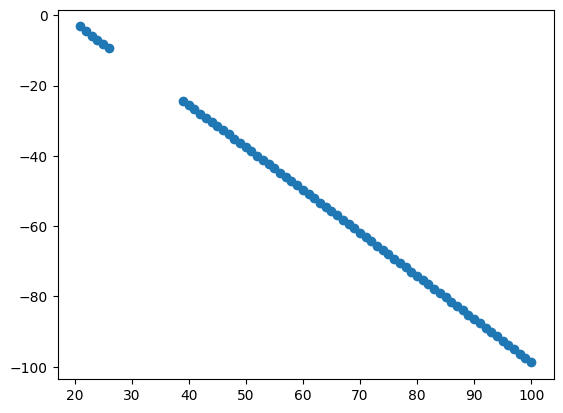

In [30]:
import matplotlib.pyplot as plt

plt.scatter(length, log_evalue)
plt.show()